In [1]:
import sys
from pathlib import Path

def in_colab():
    try:
        import google.colab  # noqa: F401
        return True
    except Exception:
        return False

if in_colab():
    from google.colab import drive
    drive.mount("/content/drive")
    REPO_PATH = Path("/content/drive/My Drive/einstein_program_synthesis/scripts")  # ← adjust if needed
else:
    REPO_PATH = Path.home() / "Documents" / "Code" / "einstein_program_synthesis" / "scripts"  # ← adjust

sys.path.insert(0, str(REPO_PATH.resolve()))
print("Using repo path:", REPO_PATH.resolve())
print("Exists?", REPO_PATH.exists())
print("Contains:", [p.name for p in REPO_PATH.glob("*.py")])


Using repo path: /home/omar/Documents/Code/einstein_program_synthesis/scripts
Exists? True
Contains: ['synthesis_primitives.py', 'einstein_types.py', 'context.py', 'judgments.py', 'typing_rules.py', 'simplify.py', 'bayes_neural_search.py', 'pure_bayes_search.py', 'synthesis_state.py', 'enumeration_search.py']


# Pure bayes search

In [2]:
import importlib
import pure_bayes_search as pbs
from einstein_types import Art, Emp

pbs = importlib.reload(pbs)
print("module path:", pbs.__file__)

module path: /home/omar/Documents/Code/einstein_program_synthesis/scripts/pure_bayes_search.py


## Search settings

In [3]:
pbs.MAX_SAMPLES  = 200
pbs.CHAIN_LENGTH = 8
pbs.USE_BAYESIAN = True

pbs.TERM_WEIGHT  = 0.7
pbs.TYPE_WEIGHT  = 0.3

pbs.GOAL_TERM    = "t - u*x/c**2"
pbs.GOAL_TYPE    = Art & Emp
pbs.TARGET_TERM  = "f(-k*y + t*w - k*u*x/c)"

pbs.BACKWARD_NAMES = {"BWD"}

pbs.ENABLE_NO_REPEAT             = True
pbs.ENABLE_SUB1_CONSTRAINT       = True
pbs.ENABLE_SIM_SIMPUS_CONSTRAINT = True
pbs.ENABLE_SIMPUS_SIM_CONSTRAINT = True
pbs.ENABLE_BACKWARD_GATE         = True
pbs.ENABLE_BACKWARD_ONLY_MODE    = False

pbs.N_DEDUPES = 500
pbs.VERBOSE   = True

# How many independent runs for this quickstart
N_RUNS = 150  # keep small for a quick demo

## Search

In [4]:
import cProfile, pstats, io, time

t0 = time.perf_counter()

results = pbs.run_experiments(N_RUNS, max_samples=pbs.MAX_SAMPLES, n_dedupe=pbs.N_DEDUPES, parallel=False)

t1 = time.perf_counter()
print(f"\n✅ Total elapsed time: {t1 - t0:.2f} seconds")


Run   1: ✅ reached at chain 7
Run   2: ✅ reached at chain 23
Run   3: ✅ reached at chain 12
Run   4: ✅ reached at chain 31
Run   5: ✅ reached at chain 8
Run   6: ✅ reached at chain 3
Run   7: ✅ reached at chain 1
Run   8: ✅ reached at chain 5
Run   9: ✅ reached at chain 12
Run  10: ✅ reached at chain 26
Run  11: ✅ reached at chain 18
Run  12: ✅ reached at chain 6
Run  13: ✅ reached at chain 6
Run  14: ✅ reached at chain 15
Run  15: ✅ reached at chain 2
Run  16: ✅ reached at chain 2
Run  17: ✅ reached at chain 25
Run  18: ✅ reached at chain 1
Run  19: ✅ reached at chain 3
Run  20: ✅ reached at chain 10
Run  21: ✅ reached at chain 14
Run  22: ✅ reached at chain 4
Run  23: ✅ reached at chain 28
Run  24: ✅ reached at chain 17
Run  25: ✅ reached at chain 22
Run  26: ✅ reached at chain 11
Run  27: ✅ reached at chain 32
Run  28: ✅ reached at chain 21
Run  29: ✅ reached at chain 22
Run  30: ✅ reached at chain 6
Run  31: ✅ reached at chain 14
Run  32: ✅ reached at chain 17
Run  33: ✅ reached at

## Success indices at which goal is met

In [5]:
success_indices_pure_bayes = [r for r in results if r is not None]
print("All program-indices at which the goal was met:")
print(success_indices_pure_bayes)


All program-indices at which the goal was met:
[7, 23, 12, 31, 8, 3, 1, 5, 12, 26, 18, 6, 6, 15, 2, 2, 25, 1, 3, 10, 14, 4, 28, 17, 22, 11, 32, 21, 22, 6, 14, 17, 3, 21, 23, 14, 1, 4, 26, 7, 4, 7, 5, 34, 3, 27, 4, 23, 7, 29, 2, 5, 25, 21, 11, 5, 15, 22, 10, 31, 17, 13, 23, 24, 6, 11, 4, 17, 9, 28, 10, 17, 17, 3, 35, 1, 18, 19, 17, 23, 27, 21, 15, 4, 18, 10, 7, 3, 12, 5, 34, 2, 20, 15, 12, 4, 10, 16, 22, 1, 22, 34, 10, 11, 30, 11, 14, 7, 5, 27, 25, 35, 27, 2, 26, 23, 19, 24, 10, 24, 23, 11, 1, 20, 14, 13, 7, 22, 1, 1, 15, 26, 13, 5, 5, 8, 1, 5, 4, 12, 17, 16, 11, 4, 23, 21, 13, 4, 27, 19]


## Save success indices

In [6]:
# Save success indices — works in Colab + VS Code/local
import os
from pathlib import Path
import numpy as np

def get_output_dir() -> Path:
    # 1) explicit override via env var
    env = os.getenv("EPS_OUTPUT_DIR")
    if env:
        return Path(env).expanduser().resolve()

    # 2) Colab (Drive mounted)
    try:
        import google.colab  # type: ignore
        base = Path("/content/drive/MyDrive")
        if not base.exists():
            base = Path("/content/drive/My Drive")  # older mount name
        return base / "einstein_program_synthesis" / "output"
    except Exception:
        pass

    # 3) Local/VS Code: put outputs in repo_root/output (or CWD/output)
    cwd = Path.cwd()
    for p in [cwd, *cwd.parents]:
        if (p / ".git").exists() or (p / "pyproject.toml").exists() or (p / "setup.cfg").exists():
            return p / "output"
    return cwd / "output"

output_dir = get_output_dir()
output_dir.mkdir(parents=True, exist_ok=True)

out_path = output_dir / "success_indices_pure_bayes.csv"
np.savetxt(
    out_path,
    success_indices_pure_bayes,
    fmt="%d",
    header="success_index",
    delimiter=",",
    comments=""
)

print(f"\n✅ Saved {len(success_indices_pure_bayes)} indices to:\n{out_path}")



✅ Saved 150 indices to:
/home/omar/Documents/Code/einstein_program_synthesis/output/success_indices_pure_bayes.csv


## Calculate statistics

In [7]:
import numpy as np

def summarize(results):
    # keep numeric, non-None, non-NaN entries
    arr = np.array([x for x in results if x is not None and not (isinstance(x, float) and np.isnan(x))], dtype=float)
    n = arr.size
    if n == 0:
        return {
            "n": 0,
            "mean": None, "std": None, "cv": None,
            "median": None, "iqr": None,
            "q25": None, "q75": None,
            "p50": None, "p90": None, "p95": None,
            "min": None, "max": None,
        }

    mean = float(arr.mean())
    std  = float(arr.std(ddof=1)) if n > 1 else 0.0  # sample std if possible
    q25  = float(np.quantile(arr, 0.25))
    med  = float(np.quantile(arr, 0.50))
    q75  = float(np.quantile(arr, 0.75))
    iqr  = float(q75 - q25)

    stats = {
        "n": n,
        "mean": mean,
        "std": std,
        "cv": (float(std/mean) if mean != 0 else None),
        "median": med,
        "iqr": iqr,
        "q25": q25,
        "q75": q75,
        "p50": med,
        "p90": float(np.percentile(arr, 90)),
        "p95": float(np.percentile(arr, 95)),
        "min": float(arr.min()),
        "max": float(arr.max()),
    }
    return stats

stats = summarize(results)
print(stats)


{'n': 150, 'mean': 14.206666666666667, 'std': 9.370306282135557, 'cv': 0.6595710663164399, 'median': 13.0, 'iqr': 17.0, 'q25': 5.0, 'q75': 22.0, 'p50': 13.0, 'p90': 27.0, 'p95': 30.549999999999983, 'min': 1.0, 'max': 35.0}


## Save statistics

In [8]:
# Save Bayes-Neural statistics — Colab + VS Code/local
import os, csv
from pathlib import Path

def get_output_dir() -> Path:
    # 1) explicit override via env var
    env = os.getenv("EPS_OUTPUT_DIR")
    if env:
        return Path(env).expanduser().resolve()

    # 2) Colab (Drive mounted)
    try:
        import google.colab  # type: ignore
        base = Path("/content/drive/MyDrive")
        if not base.exists():
            base = Path("/content/drive/My Drive")  # older mount name
        return base / "einstein_program_synthesis" / "output"
    except Exception:
        pass

    # 3) Local/VS Code: repo root's output/ (fallback to CWD/output)
    cwd = Path.cwd()
    for p in [cwd, *cwd.parents]:
        if (p / ".git").exists() or (p / "pyproject.toml").exists() or (p / "setup.cfg").exists():
            return p / "output"
    return cwd / "output"

output_dir = get_output_dir()
output_dir.mkdir(parents=True, exist_ok=True)

csv_path = output_dir / "pure_bayes_stats.csv"

# stable ordering for columns
cols = ["n","mean","std","cv","median","iqr","q25","q75","p50","p90","p95","min","max"]

with open(csv_path, "w", newline="", encoding="utf-8") as fp:
    writer = csv.writer(fp)
    writer.writerow(cols)
    writer.writerow([stats.get(c, "") for c in cols])  # uses empty if missing

print(f"\n✅ Saved Pure Bayes stats to:\n{csv_path}")



✅ Saved Pure Bayes stats to:
/home/omar/Documents/Code/einstein_program_synthesis/output/pure_bayes_stats.csv


## Plot success rate versus program index

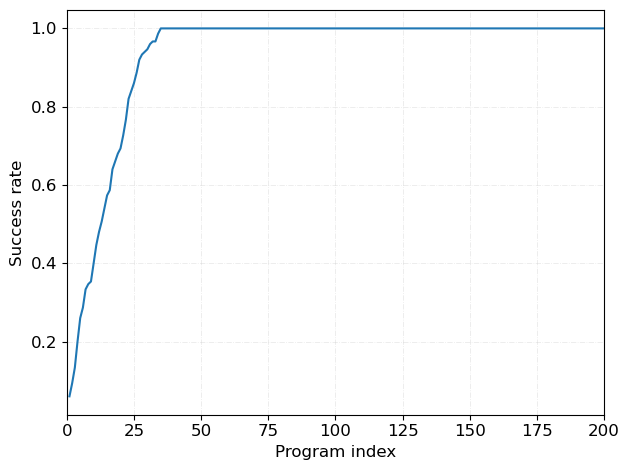

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given success indices from this batch
success_array = np.array(success_indices_pure_bayes, dtype=int)
max_program = pbs.MAX_SAMPLES  # x-axis limit (your sampling budget)

# X axis: program indices 1..max_program
x = np.arange(1, max_program + 1)

# Cumulative success rate at each program index k
success_rate = np.array([(success_array <= k).sum() for k in x]) / max(N_RUNS, 1)

# Plot
plt.figure()
plt.plot(x, success_rate)
plt.xlabel("Program index", fontsize=12)
plt.ylabel("Success rate", fontsize=12)
# plt.title("Success Rate over Program Index")

# Bigger tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Force x-axis from 0 to max_program
plt.xlim(0, max_program)

# Grid a bit darker/heavier (like your screenshot)
plt.grid(
    True,
    color="#CCCCCC",   # darker gray
    linewidth=0.6,     # slightly thicker
    linestyle='-.',    # dashed-dot
    alpha=0.4          # more opaque
)

# Optional: remove top & right spines
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()




## Reset caches

In [10]:
pbs.expr_to_str.cache_clear()
pbs.closeness_cached.cache_clear()
pbs._apply_primitive_cached.cache_clear()
pbs._ctx_cache.clear(); pbs._cursor_cache.clear()
